In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


455/455 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.3530 - loss: 1.6275 - val_accuracy: 0.7230 - val_loss: 0.8354
Epoch 2/4
455/455 ━━━━━━━━━━━━━━━━━━━━ 55s 121ms/step - accuracy: 0.7434 - loss: 0.7555 - val_accuracy: 0.8186 - val_loss: 0.5428
Epoch 3/4
455/455 ━━━━━━━━━━━━━━━━━━━━ 56s 123ms/step - accuracy: 0.8403 - loss: 0.4784 - val_accuracy: 0.8277 - val_loss: 0.5020
Epoch 4/4
455/455 ━━━━━━━━━━━━━━━━━━━━ 56s 122ms/step - accuracy: 0.8837 - loss: 0.3586 - val_accuracy: 0.8307 - val_loss: 0.5108
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


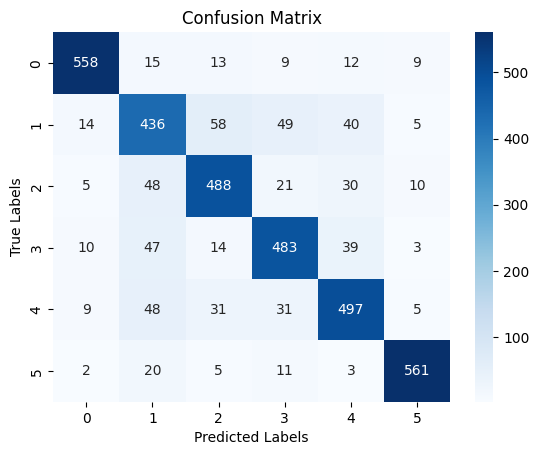

              precision    recall  f1-score   support

       korku       0.93      0.91      0.92       616
   küçümseme       0.71      0.72      0.72       602
    mutluluk       0.80      0.81      0.81       602
        öfke       0.80      0.81      0.81       596
      üzüntü       0.80      0.80      0.80       621
   şaşkınlık       0.95      0.93      0.94       602

    accuracy                           0.83      3639
   macro avg       0.83      0.83      0.83      3639
weighted avg       0.83      0.83      0.83      3639



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Verilerin Yüklenmesi ve Hazırlanması
df = pd.read_excel('/content/sample_data/duygular_stemmed.xlsx')  # Excel dosyanızın adını girin

# Eksik veya boş değerleri kontrol etme ve temizleme
df.dropna(subset=['comments'], inplace=True)

comments = df['comments'].astype(str)  # Metinleri string olarak alma
labels = df['label']

# Metinleri tokenize etme
tokenizer = Tokenizer(num_words=20000)  # Tokenizer'ı oluşturun
tokenizer.fit_on_texts(comments)  # Tokenizer'ı metinlere uyarlayın
sequences = tokenizer.texts_to_sequences(comments)  # Metinleri sayısal dizilere çevirin

# Dizileri aynı uzunlukta pad etme
maxlen = 100  # Maksimum dizi uzunluğu
data = pad_sequences(sequences, maxlen=maxlen)  # Dizileri pad edin

# Etiketleri sayısal hale getirme
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels, num_classes=6)  # 6 kategori olduğunu varsayıyoruz

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(data, categorical_labels, test_size=0.2, random_state=42)

# 2. Modelin Oluşturulması ve Eğitilmesi
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=64, input_length=maxlen))
model.add(LSTM(32, dropout=0.7, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))  # 6 kategori olduğu için output layer 6 nöronlu

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, batch_size=32, epochs=4, validation_data=(X_test, y_test))

# 3. Modelin Değerlendirilmesi
# Modeli test verisi üzerinde değerlendirme
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix oluşturma
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Sınıflandırma raporu oluşturma
report = classification_report(y_true, y_pred_classes, target_names=encoder.classes_)
print(report)
